# Project: Investigate Impact of Education and Gender Parity on Human Development Index

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The datasets selected for this analysis are:
<ol>
    <li> global Human Development Index (HDI) values between 1990-2018 </li>
    <li> mean years in school men 15 to 24 years between 1970-2015 </li>
    <li> mean years in school women 15 to 24 years between 1970-2015 </li>
</ol>

The goal of this analysis is to investigate whether early education (defined as 15-24 years old) has a correlation to high HDI.  In addition, the analysis will be extended to investigate whether gender parity in the early education has any correlation to HDI.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_hdi = pd.read_csv('hdi_human_development_index.csv')
df_men = pd.read_csv('mean_years_in_school_men_15_to_24_years.csv')
df_women = pd.read_csv('mean_years_in_school_women_15_to_24_years.csv')

In [3]:
# Checking for duplicates.  If = 0, no duplicates
print(sum(df_hdi.duplicated()))
print(sum(df_men.duplicated()))
print(sum(df_women.duplicated()))

0
0
0


In [4]:
# Check datatypes
df_hdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 30 columns):
country    188 non-null object
1990       143 non-null float64
1991       143 non-null float64
1992       142 non-null float64
1993       143 non-null float64
1994       143 non-null float64
1995       147 non-null float64
1996       147 non-null float64
1997       146 non-null float64
1998       147 non-null float64
1999       150 non-null float64
2000       173 non-null float64
2001       173 non-null float64
2002       174 non-null float64
2003       176 non-null float64
2004       178 non-null float64
2005       185 non-null float64
2006       185 non-null float64
2007       185 non-null float64
2008       185 non-null float64
2009       185 non-null float64
2010       187 non-null float64
2011       187 non-null float64
2012       187 non-null float64
2013       187 non-null float64
2014       187 non-null float64
2015       187 non-null float64
2016       187 non-null float64


In [5]:
df_men.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 47 columns):
country    187 non-null object
1970       187 non-null float64
1971       187 non-null float64
1972       187 non-null float64
1973       187 non-null float64
1974       187 non-null float64
1975       187 non-null float64
1976       187 non-null float64
1977       187 non-null float64
1978       187 non-null float64
1979       187 non-null float64
1980       187 non-null float64
1981       187 non-null float64
1982       187 non-null float64
1983       187 non-null float64
1984       187 non-null float64
1985       187 non-null float64
1986       187 non-null float64
1987       187 non-null float64
1988       187 non-null float64
1989       187 non-null float64
1990       187 non-null float64
1991       187 non-null float64
1992       187 non-null float64
1993       187 non-null float64
1994       187 non-null float64
1995       187 non-null float64
1996       187 non-null float64


In [6]:
df_women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 47 columns):
country    187 non-null object
1970       187 non-null float64
1971       187 non-null float64
1972       187 non-null float64
1973       187 non-null float64
1974       187 non-null float64
1975       187 non-null float64
1976       187 non-null float64
1977       187 non-null float64
1978       187 non-null float64
1979       187 non-null float64
1980       187 non-null float64
1981       187 non-null float64
1982       187 non-null float64
1983       187 non-null float64
1984       187 non-null float64
1985       187 non-null float64
1986       187 non-null float64
1987       187 non-null float64
1988       187 non-null float64
1989       187 non-null float64
1990       187 non-null float64
1991       187 non-null float64
1992       187 non-null float64
1993       187 non-null float64
1994       187 non-null float64
1995       187 non-null float64
1996       187 non-null float64


### Data Cleaning

To clean the data for visualization, we first drop all the rows in the HDI dataframe that have null values.  Next, we keep all columns between 1990-2015 as HDI data only started after 1990 and the mean_years_schooling data ends in 2015.  Lastly, we create a new dataframe with only countries that exist in all 3 dataframes.

In [7]:
# Dropping all rows in the HDI dataframe that have null values
df_hdi.dropna(inplace=True)

In [8]:
# Dropping columns that the year is less than 1990 and greater than 2015.  This is because HDI data only started in 1990 and the mean_years_school data ends in 2015
df_hdi.drop([col for col in df_hdi.columns[1:] if (int(col) < 1990 or int(col) > 2015)], axis=1, inplace=True)
df_men.drop([col for col in df_men.columns[1:] if (int(col) < 1990 or int(col) > 2015)], axis=1, inplace=True)
df_women.drop([col for col in df_women.columns[1:] if (int(col) < 1990 or int(col) > 2015)], axis=1, inplace=True)

In [9]:
# Dropping all rows (country) that do not exist in all 3 dataframes
df_men.drop(df_men[~df_men['country'].isin(df_hdi['country'])].index, inplace=True)
df_men.drop(df_men[~df_men['country'].isin(df_women['country'])].index, inplace=True)

df_hdi.drop(df_hdi[~df_hdi['country'].isin(df_men['country'])].index, inplace=True)
df_women.drop(df_women[~df_women['country'].isin(df_men['country'])].index, inplace=True)

In [10]:
# Create dataframe with sum of male + female mean school years

df_men_temp = df_men.drop('country', axis=1)
df_women_temp = df_women.drop('country', axis=1)
df_country_temp = df_men.country

df_mean_years_school = df_men_temp + df_women_temp / 2
df_mean_years_school.insert(0, "country", df_country_temp, True)

In [11]:
# Create dataframe with sum of male - female mean school years to represent gender parity

df_men_temp2 = df_men.drop('country', axis=1)
df_women_temp2 = df_women.drop('country', axis=1)
df_country_temp2 = df_men.country

df_mean_years_school_difference = df_men_temp2 - df_women_temp2
df_mean_years_school_difference.insert(0, "country", df_country_temp2, True)

<a id='eda'></a>
## Exploratory Data Analysis

### Does more years in school correlate to high HDI?

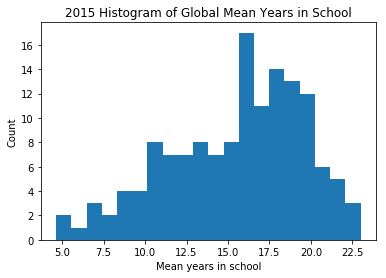

In [12]:
# Display the distribution of mean years in school for all countries in dataset in 2015 (latest available year)
plt.hist(df_mean_years_school['2015'], 20)
plt.title('2015 Histogram of Global Mean Years in School')
plt.xlabel('Mean years in school')
plt.ylabel('Count')

plt.show()

The distribution is left skewed towards more early education.  This means that more countries of the world are spending more time educating the youth.

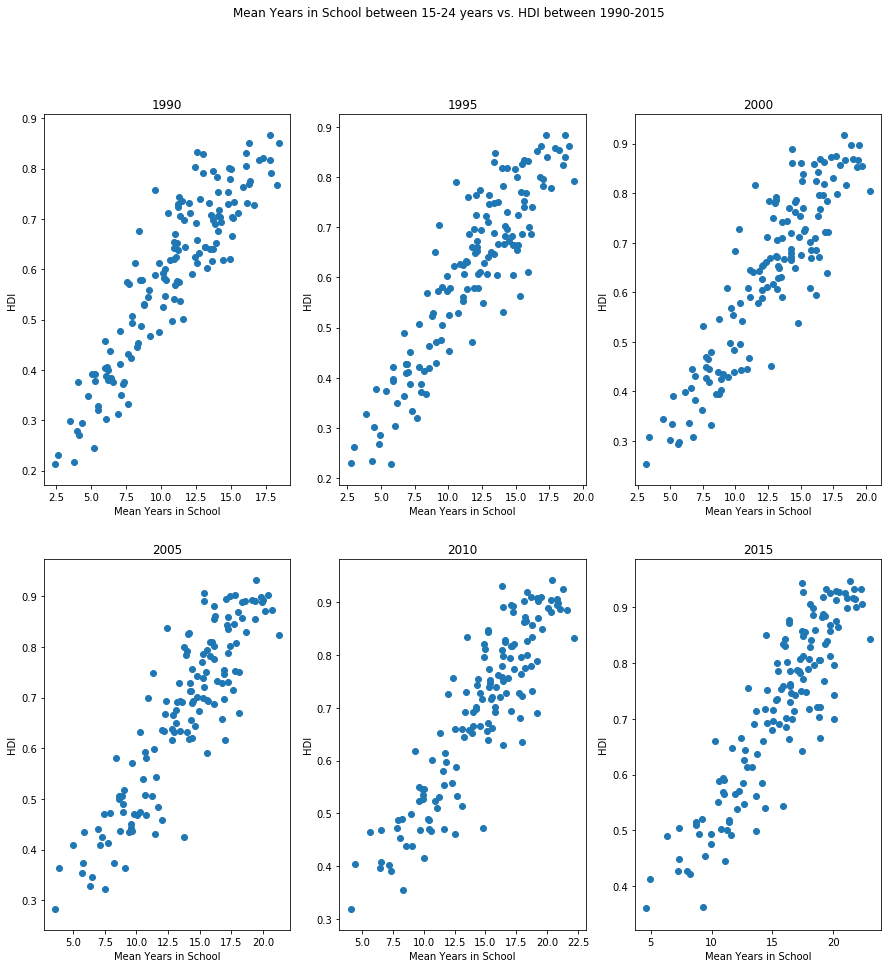

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(15,15))
fig.suptitle('Mean Years in School between 15-24 years vs. HDI between 1990-2015')

axs[0,0].scatter(x=df_mean_years_school['1990'], y=df_hdi['1990'])
axs[0,0].set_xlabel('Mean Years in School')
axs[0,0].set_ylabel('HDI')
axs[0,0].set_title('1990')

axs[0,1].scatter(x=df_mean_years_school['1995'], y=df_hdi['1995'])
axs[0,1].set_xlabel('Mean Years in School')
axs[0,1].set_ylabel('HDI')
axs[0,1].set_title('1995')

axs[0,2].scatter(x=df_mean_years_school['2000'], y=df_hdi['2000'])
axs[0,2].set_xlabel('Mean Years in School')
axs[0,2].set_ylabel('HDI')
axs[0,2].set_title('2000')

axs[1,0].scatter(x=df_mean_years_school['2005'], y=df_hdi['2005'])
axs[1,0].set_xlabel('Mean Years in School')
axs[1,0].set_ylabel('HDI')
axs[1,0].set_title('2005')

axs[1,1].scatter(x=df_mean_years_school['2010'], y=df_hdi['2010'])
axs[1,1].set_xlabel('Mean Years in School')
axs[1,1].set_ylabel('HDI')
axs[1,1].set_title('2010')

axs[1,2].scatter(x=df_mean_years_school['2015'], y=df_hdi['2015'])
axs[1,2].set_xlabel('Mean Years in School')
axs[1,2].set_ylabel('HDI')
axs[1,2].set_title('2015')

plt.show()

From the plots, it is evident that more years in school between 15-24 correlates to a higher HDI.  There is a strong correlation between these 2 parameters.

### Does gender equality in education have any effect on HDI?

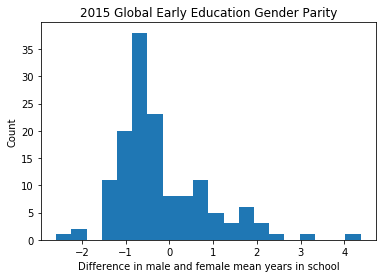

In [14]:
# Display the distribution of mean years in school for all countries in dataset
plt.hist(df_mean_years_school_difference['2015'], 20)
plt.title('2015 Global Early Education Gender Parity')
plt.xlabel('Difference in male and female mean years in school')
plt.ylabel('Count')

plt.show()

There is a peak at -0.5 which illustrates that many countries have more female education than male education.  In addition, 90% of the data is between -1 and +1 to show that gender parity is quite even amongst majority countries of the world.  There are a few countries with apparent patriarchal societies (3+ years difference) and also a couple with matriarchal societies.

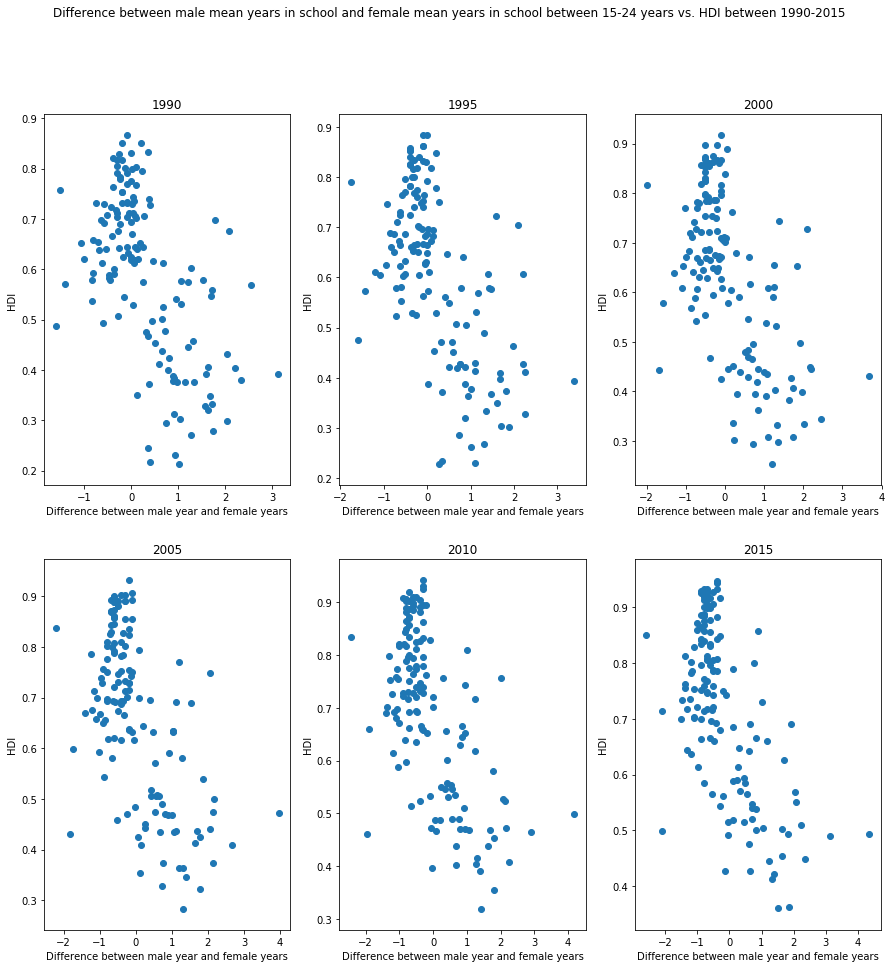

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(15,15))
fig.suptitle('Difference between male mean years in school and female mean years in school between 15-24 years vs. HDI between 1990-2015')

axs[0,0].scatter(x=df_mean_years_school_difference['1990'], y=df_hdi['1990'])
axs[0,0].set_xlabel('Difference between male year and female years')
axs[0,0].set_ylabel('HDI')
axs[0,0].set_title('1990')

axs[0,1].scatter(x=df_mean_years_school_difference['1995'], y=df_hdi['1995'])
axs[0,1].set_xlabel('Difference between male year and female years')
axs[0,1].set_ylabel('HDI')
axs[0,1].set_title('1995')

axs[0,2].scatter(x=df_mean_years_school_difference['2000'], y=df_hdi['2000'])
axs[0,2].set_xlabel('Difference between male year and female years')
axs[0,2].set_ylabel('HDI')
axs[0,2].set_title('2000')

axs[1,0].scatter(x=df_mean_years_school_difference['2005'], y=df_hdi['2005'])
axs[1,0].set_xlabel('Difference between male year and female years')
axs[1,0].set_ylabel('HDI')
axs[1,0].set_title('2005')

axs[1,1].scatter(x=df_mean_years_school_difference['2010'], y=df_hdi['2010'])
axs[1,1].set_xlabel('Difference between male year and female years')
axs[1,1].set_ylabel('HDI')
axs[1,1].set_title('2010')

axs[1,2].scatter(x=df_mean_years_school_difference['2015'], y=df_hdi['2015'])
axs[1,2].set_xlabel('Difference between male year and female years')
axs[1,2].set_ylabel('HDI')
axs[1,2].set_title('2015')

plt.show()

The gender parity was calculated by subtracting mean female years of schooling from mean male years of schooling.  A positive number indicates more patriarchal society while negative indicates the opposite.

The first thing that we can see is that more of the world is patriarchal society as seen from more positive points than negative points.  There is a steep decline from the peak HDIs of ~0.9 as we move from a gender equal society to patriarchal.

The second more interesting point is that the same holds true for matriarchal societies.  As we move away from the gender neutral towards the negative gender parity values, there is a decline in HDI.  This indicates that statistically, the highest HDI values occur as gender parity in early education.

<a id='conclusions'></a>
## Conclusions

In conclusion, early education is a solid indicator of high human development index (HDI).  The highest HDI of 0.9 are correlated to countries with 20+ years of mean education while the lowest HDI of 0.3 correlate to countries with <5 years of mean education.

Furthermore, there is also another correlation between gender parity in early education and HDI.  Interestingly, the closer to gender equality (defined by equal mean years of schooling between female and male), the higher the HDI.  On either side, whether patriarchal or matriarchal society, the HDI declines.

The limitations of this analysis is the assumption that mean school years represents gender parity.  There are numerous factors that can contribute to gender parity (income, employment etc.), and this analysis only focuses on a single parameter.  Furthermore, this dataset accounts only for static data.  It would be interesting to investigate whether countries moving towards gender parity had an increase in HDI score.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [16]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0